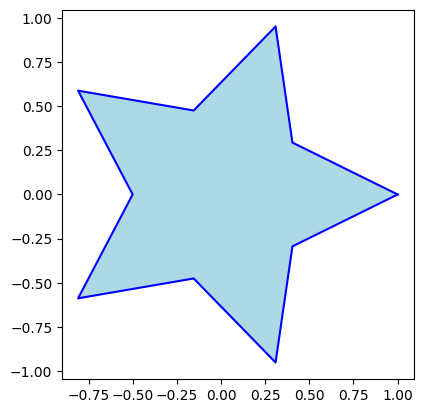

In [1]:
#FILLED GEOMETRIC STAR
import numpy as np
import matplotlib.pyplot as plt

# Function to create a star
def draw_star(points=5):
    # Generate angle values from 0 to 2π (360 degrees), with twice the number of points plus one for closure
    theta = np.linspace(0, 2*np.pi, points * 2 + 1)
    
    # Radii for the star's vertices; alternate between 1 (outer point) and 0.5 (inner point)
    r = np.array([1 if i % 2 == 0 else 0.5 for i in range(points * 2 + 1)])
    
    # Calculate x and y coordinates for each point using trigonometric functions
    x = r * np.cos(theta)  # x = r * cos(θ)
    y = r * np.sin(theta)  # y = r * sin(θ)
    
    # Plot the star outline
    plt.plot(x, y, 'b-')  # 'b-' is a blue solid line
    
    # Fill the star shape with color
    plt.fill(x, y, 'lightblue')  # Light blue fill
    
    # Ensure equal scaling for x and y axes to maintain the shape's proportions
    plt.gca().set_aspect('equal')
    
    # Display the plot
    plt.show()

# Call the function to draw the star
draw_star()

MovieWriter imagemagick unavailable; using Pillow instead.


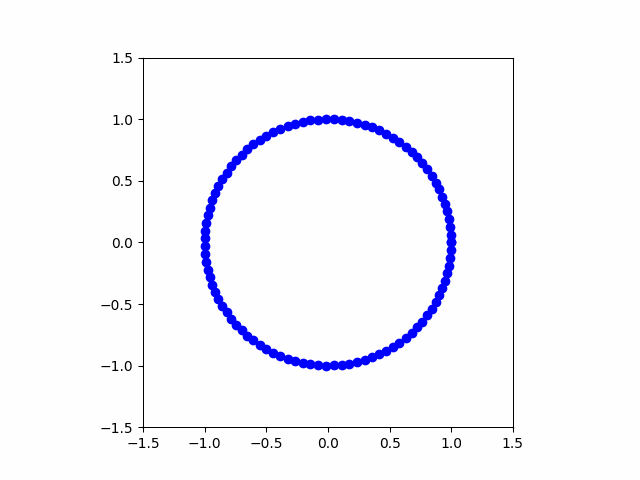

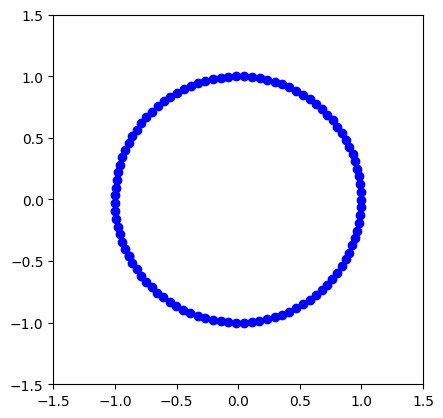

In [22]:
# Ensure the appropriate backend is used for animations
%matplotlib inline

import numpy as np
import cmath
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Set up the figure and axis
fig, ax = plt.subplots()
ax.set_xlim(-1.5, 1.5)  # Set x-axis limits
ax.set_ylim(-1.5, 1.5)  # Set y-axis limits
ax.set_aspect('equal')  # Ensure equal scaling for x and y axes
line, = ax.plot([], [], 'bo')  # Initialize an empty plot with blue circles

# Initialization function for the animation
def init():
    line.set_data([], [])
    return line,

# Update function for each frame of the animation
def update_circle(frame):
    theta = np.linspace(0, 2 * np.pi, 100)
    points = [cmath.exp(1j * (t + frame / 10.0)) for t in theta]
    line.set_data([p.real for p in points], [p.imag for p in points])
    return line,

# Create the animation
ani = animation.FuncAnimation(
    fig, update_circle,  # Animation function to call
    init_func=init,      # Initialization function
    frames=100,          # Number of frames
    interval=50,         # Time between frames in milliseconds
    blit=True            # Optimize animation by redrawing only parts that have changed
)

# Save the animation as a GIF
ani.save('circle_animation.gif', writer='imagemagick')

# Display the saved GIF
from IPython.display import Image
Image(filename='circle_animation.gif')

MovieWriter imagemagick unavailable; using Pillow instead.


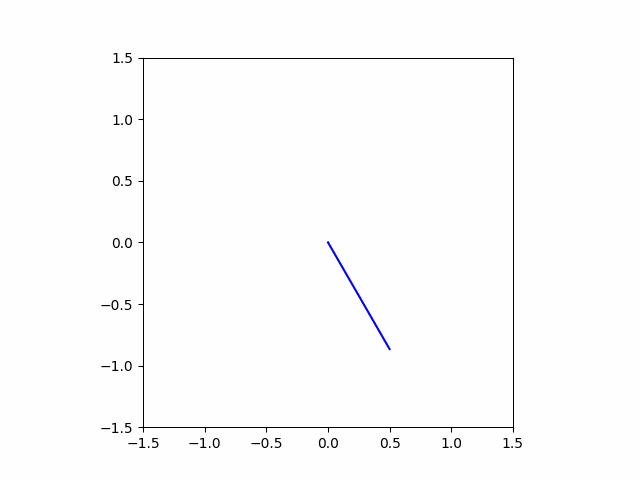

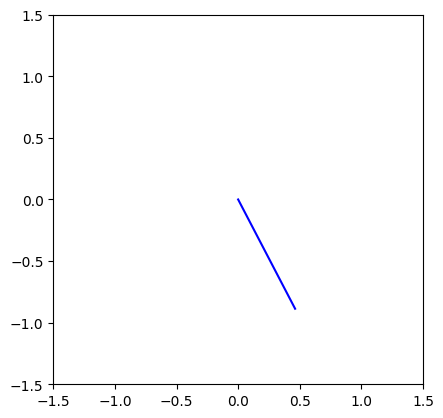

In [24]:
# Ensure the appropriate backend is used for animations
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import cmath

# Constants
g = 9.81  # Acceleration due to gravity (m/s^2)
L = 1.0   # Length of the pendulum (meters)
theta_0 = np.pi / 6  # Initial angle (radians)

# Angular frequency
omega = np.sqrt(g / L)

# Time range for the animation
t_max = 10  # Maximum time (seconds)
frames = 100  # Number of frames in the animation
interval = t_max / frames * 1000  # Interval between frames in milliseconds

# Set up the figure and axis
fig, ax = plt.subplots()
line, = ax.plot([], [], 'b-')
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.set_aspect('equal')

# Initialization function
def init():
    line.set_data([], [])
    return line,

# Animation function
def animate(frame):
    t = frame * t_max / frames  # Calculate the time at the current frame
    # Calculate the angle at time t using the small-angle approximation
    theta_t = theta_0 * cmath.cos(omega * t).real  # .real gets the real part of the complex number
    
    # Calculate the x and y coordinates of the pendulum bob
    x = L * np.sin(theta_t)
    y = -L * np.cos(theta_t)
    
    # Update the line data
    line.set_data([0, x], [0, y])
    return line,

# Create the animation MAKE SURE THIS UPDATES ON BINDER
ani = animation.FuncAnimation(
    fig, animate,  # Animation function to call
    init_func=init,  # Initialization function
    frames=frames,  # Number of frames
    interval=interval,  # Time between frames in milliseconds
    blit=True  # Optimize animation by redrawing only parts that have changed
)

# Save the animation as a GIF
ani.save('pendulum_animation.gif', writer='imagemagick')

# Display the saved GIF
from IPython.display import Image
Image(filename='pendulum_animation.gif')
